In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_path_covid = 'BindingDB_Covid-19.tsv'
data_path = '../BindingDB_All.tsv'

In [4]:
df = pd.read_csv(data_path, sep='\t', on_bad_lines='skip')
df.head()

/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_75395/2278154711.py:1: DtypeWarning: Columns (8,9,10,11,12,13,15,17,18,20,21,22,23,27,28,32,33,35,36,45,46,47,48,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79,81,82,83,86,87,88,89,90,91,93,94,95,98,99,100,101,102,103,105,106,107,110,111,112,113,114,115,117,118,119,122,123,124,125,126,127,129,130,131,134,135,136,137,138,139,146,147,148,149,150,151,158,159,160,161,162,163,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='\t', on_bad_lines='skip')


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
upper = df[df['IC50 (nM)'].apply(lambda x: type(x)==str and '>' in x)]
lower = df[df['IC50 (nM)'].apply(lambda x: type(x)==str and '<' in x)]
nan = df[df['IC50 (nM)'].isna()]

In [20]:
names = ['Exact values', 'Lower bounds', 'Upper bounds', 'NaN']
vals = [len(df)-len(upper)-len(lower)-len(nan), len(lower), len(upper), len(nan)]

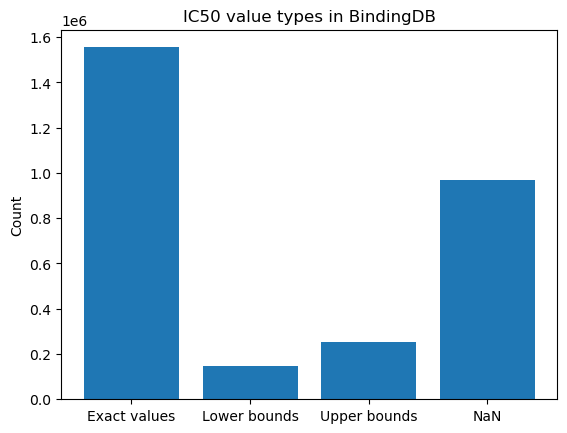

In [23]:
plt.bar(names, vals)
plt.ylabel('Count')
plt.title('IC50 value types in BindingDB');

In [94]:
useful_cols = ['BindingDB Reactant_set_id', 'Ligand SMILES', 'Target Name','Ki (nM)', 'IC50 (nM)', 
'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)', 'koff (s-1)', 'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain']
target_names = ['UniProt (SwissProt) Entry Name of Target Chain.{}'.format(i) for i in range(1,13)]
all_useful_cols = useful_cols + target_names
filtered_df = df[all_useful_cols]
filtered_df

,BindingDB Reactant_set_id,Ligand SMILES,Target Name,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),BindingDB Target Chain Sequence,...,UniProt (SwissProt) Entry Name of Target Chain.3,UniProt (SwissProt) Entry Name of Target Chain.4,UniProt (SwissProt) Entry Name of Target Chain.5,UniProt (SwissProt) Entry Name of Target Chain.6,UniProt (SwissProt) Entry Name of Target Chain.7,UniProt (SwissProt) Entry Name of Target Chain.8,UniProt (SwissProt) Entry Name of Target Chain.9,UniProt (SwissProt) Entry Name of Target Chain.10,UniProt (SwissProt) Entry Name of Target Chain.11,UniProt (SwissProt) Entry Name of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],0.24,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],0.25,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],0.41,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],0.8,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],0.99,NaN,NaN,NaN,NaN,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927359,51531022,CC[C@H]1CN(Cc2cc(C)cc(CC(O)=O)c2)CCN1c1nc2ccc(...,Peroxisome proliferator-activated receptor gamma,NaN,NaN,NaN,670,NaN,NaN,MGETLGDSPVDPEHGAFADALPMSTSQEITMVDTEMPFWPTNFGIS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927360,51531023,CC[C@@H]1CN(Cc2cc(C)cc(CC(O)=O)c2)CCN1c1nc2ccc...,Peroxisome proliferator-activated receptor gamma,NaN,NaN,NaN,40,NaN,NaN,MGETLGDSPVDPEHGAFADALPMSTSQEITMVDTEMPFWPTNFGIS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927361,51531024,CC(C)[C@@H]1CN(Cc2cc(C)cc(CC(O)=O)c2)CCN1c1nc2...,Peroxisome proliferator-activated receptor gamma,NaN,NaN,NaN,230,NaN,NaN,MGETLGDSPVDPEHGAFADALPMSTSQEITMVDTEMPFWPTNFGIS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927362,51531025,COc1ccc(cc1)N(C)c1nc(C)nc2[nH]ccc12,Similar to alpha-tubulin isoform 1,NaN,2600,NaN,NaN,NaN,NaN,CVSASPSTLARLVSRSAMPAGSSTAWNTAFSPMARCQVTKTIGGGD...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
print("Missing Ki values rate: ", filtered_df[['Ki (nM)']].isna().sum().values/len( filtered_df[['Ki (nM)']]))
print("Missing IC50 values rate: ", filtered_df[['IC50 (nM)']].isna().sum().values/len( filtered_df[['IC50 (nM)']]))
print("Missing Kd values rate: ", filtered_df[['Kd (nM)']].isna().sum().values/len( filtered_df[['Kd (nM)']]))
print("Missing EC50 values rate: ", filtered_df[['EC50 (nM)']].isna().sum().values/len( filtered_df[['EC50 (nM)']]))
print("Missing Kon values rate: ", filtered_df[['kon (M-1-s-1)']].isna().sum().values/len( filtered_df[['kon (M-1-s-1)']]))
print("Missing Koff values rate: ", filtered_df[['koff (s-1)']].isna().sum().values/len( filtered_df[['koff (s-1)']]))

Missing Ki values rate:  [0.79742492]
Missing IC50 values rate:  [0.33105142]
Missing Kd values rate:  [0.96203274]
Missing EC50 values rate:  [0.9084931]
Missing Kon values rate:  [0.99965635]
Missing Koff values rate:  [0.99966318]


In [95]:
for t in target_names: 
    print("Missing values rate: ", filtered_df[[t]].isna().sum().values/len( filtered_df[[t]]))
print("Missing values rate: ", filtered_df[['UniProt (SwissProt) Entry Name of Target Chain']].isna().sum().values/len( filtered_df[['UniProt (SwissProt) Entry Name of Target Chain']]))
# -> we focus on complexes with only one protein
print(len(filtered_df))
single_prot_df = filtered_df[filtered_df[target_names].isna().all(axis=1)] # rates are not all 1 but still I drop no rows :( TODO
single_prot_df = single_prot_df[useful_cols]
print(len(single_prot_df))

Missing values rate:  [0.94722317]
Missing values rate:  [0.98783376]
Missing values rate:  [0.9947492]
Missing values rate:  [0.99709773]
Missing values rate:  [0.99866125]
Missing values rate:  [0.99893864]
Missing values rate:  [0.99893966]
Missing values rate:  [0.99895674]
Missing values rate:  [0.99917195]
Missing values rate:  [0.99917263]
Missing values rate:  [0.99999009]
Missing values rate:  [1.]
Missing values rate:  [0.02997885]
2927364
2772802


In [125]:
filtered_df[['IC50 (nM)']].value_counts()

IC50 (nM)
>10000       63914
<100         52460
>100000      37042
 550         24058
>1000        23089
             ...  
 38.61           1
 38.65           1
 12591           1
 38.73           1
7.0              1
Name: count, Length: 59230, dtype: int64

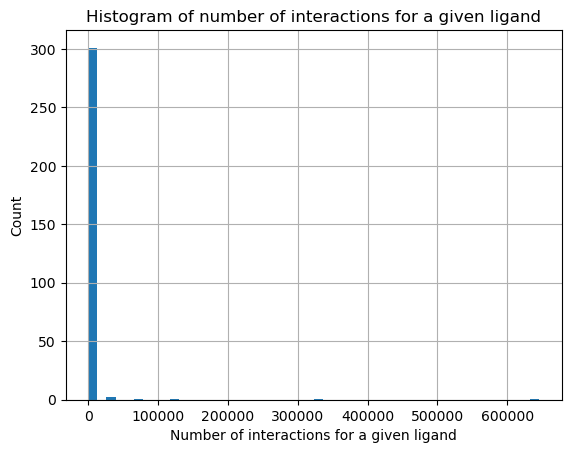

In [99]:
filtered_df.groupby('Ligand SMILES').size().value_counts().hist(bins=50)
plt.ylabel('Count');
plt.xlabel('Number of interactions for a given ligand');
plt.title('Histogram of number of interactions for a given ligand');

In [108]:
count = single_prot_df.groupby('Ligand SMILES').size().values
test = count > 2
len(test)

1208772

In [109]:
np.sum(test)

279384

Text(0.5, 0, 'Number of mutants of a given protein tested against a given ligand')

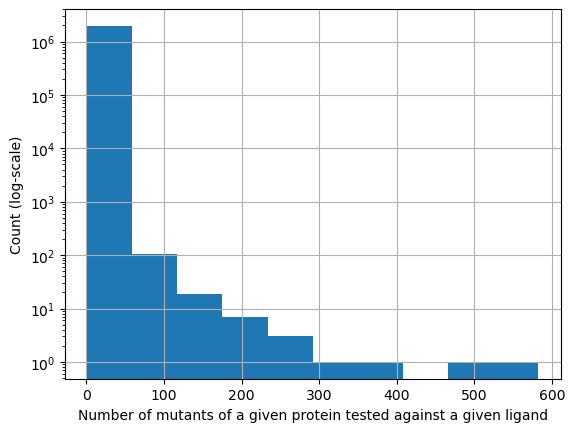

In [124]:
count2 = single_prot_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).size().hist(log=True)
plt.ylabel('Count (log-scale)')
plt.xlabel('Number of mutants of a given protein tested against a given ligand')

In [98]:
single_prot_df.to_csv('single_prot_processed_data.csv')